In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt


In [2]:
logs = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv')
data = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
des = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv')

print(data.shape)
print(logs.shape)
print(des.shape)

(180519, 53)
(469977, 8)
(52, 2)


In [3]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
def eda(df):
    summary = pd.DataFrame()
    summary['missing'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    summary['dtype'] = df.dtypes
 
    
    return summary

res = eda(data)
res

,missing,nlevel,dtype
Type,0,4,object
Days for shipping (real),0,7,int64
Days for shipment (scheduled),0,4,int64
Benefit per order,0,21998,float64
Sales per customer,0,2927,float64
Delivery Status,0,4,object
Late_delivery_risk,0,2,int64
Category Id,0,51,int64
Category Name,0,50,object
Customer City,0,563,object


# Featuers with levels < 10

In [5]:
res[res['nlevel']<12].index

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer Country',
       'Customer Email', 'Customer Password', 'Customer Segment',
       'Department Id', 'Department Name', 'Market', 'Order Item Quantity',
       'Order Status', 'Product Description', 'Product Status',
       'Shipping Mode'],
      dtype='object')

In [6]:
for c in data.columns:
    print(data[c].value_counts().head(10) )
    print('\n')

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64


2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64


4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64


0.000000      1177
143.990005     199
72.000000      194
46.799999      188
24.000000      181
18.000000      175
63.700001      172
62.400002      168
12.000000      166
14.400000      166
Name: Benefit per order, dtype: int64


122.839996    1264
109.190002    1247
124.790001    1243
129.990005    1243
116.989998    1243
123.489998    1243
120.889999    1243
127.389999    1243
97.489998     1243
118.290001    1243
Name: Sales per customer, dtype: int64


Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64


1    98977
0    81542
Name: Late_delivery_risk, dtype: int64


17    2

# One value columns

In [7]:
one_value_cols = res[res['nlevel'] == 1].index.values
one_value_cols

array(['Customer Email', 'Customer Password', 'Product Status'],
      dtype=object)

In [8]:
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['ship_ord_diff'] = (data['shipping date (DateOrders)'] - data['order date (DateOrders)']).dt.days 
data['order_dt'] = data['order date (DateOrders)'].dt.date
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,ship_ord_diff,order_dt
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,3,2018-01-31
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,5,2018-01-13
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,4,2018-01-13
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,3,2018-01-13
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2,2018-01-13


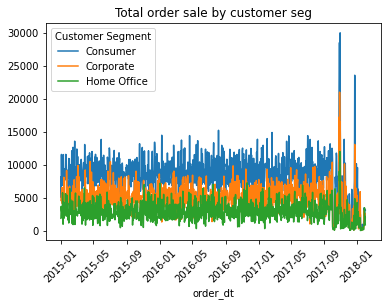

In [9]:
data.sample(int(len(data)*0.5)).groupby(['order_dt','Customer Segment'])['Sales'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order sale by customer seg')
plt.show()

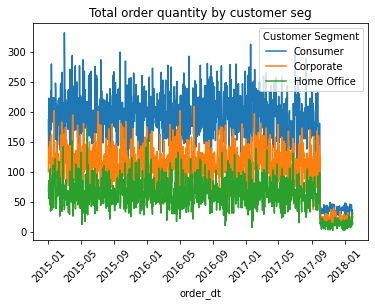

In [10]:
data.groupby(['order_dt','Customer Segment'])['Order Item Quantity'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order quantity by customer seg')
plt.show()

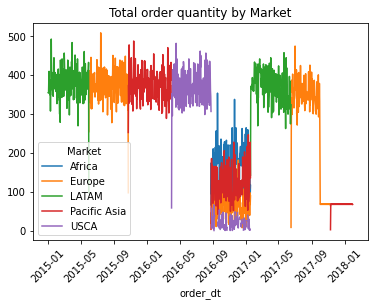

In [11]:
data.groupby(['order_dt','Market'])['Order Item Quantity'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order quantity by Market')
plt.show()

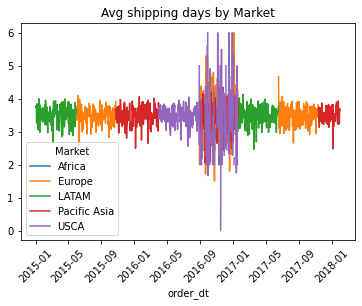

In [12]:
data.groupby(['order_dt','Market'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Avg shipping days by Market')
plt.show()


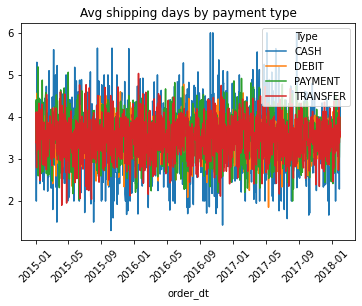

In [13]:
data.groupby(['order_dt','Type'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Avg shipping days by payment type')
plt.show()


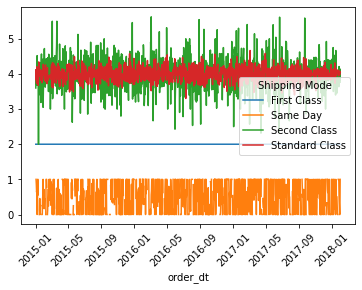

In [14]:
data.groupby(['order_dt','Shipping Mode'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.show()


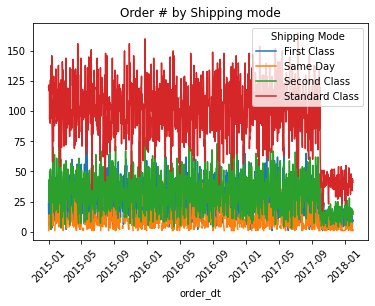

In [15]:
data.groupby(['order_dt','Shipping Mode'])['Order Id'].size().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Order # by Shipping mode')
plt.show()

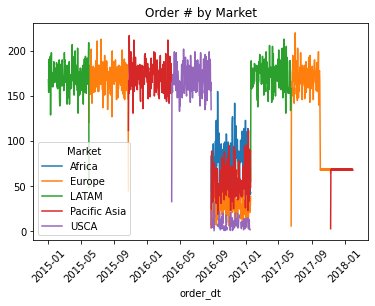

In [16]:
data.groupby(['order_dt','Market'])['Order Id'].size().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Order # by Market')
plt.show()